In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt

#### Merge data from each month into one CSV

In [9]:
df = pd.read_csv('./Sales_Data/Sales_April_2019.csv')

files = [file for file in os.listdir('./Sales_Data')]

all_months_data = pd.DataFrame()

for file in files:
    #print(file)  #List all files in sales dir
    df = pd.read_csv('./Sales_Data/'+file)
    all_months_data = pd.concat([all_months_data,df])
#print(all_months_data.head())


## Saving merged data into another csv
all_months_data.to_csv('all_data.csv', index=False)

  Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
1      NaN                         NaN              NaN        NaN   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001  
1             NaN                                   NaN  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  


In [2]:
## Read in updated dataframe
all_data = pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [3]:
print('Shape: ',all_data.shape)
print('Rows: ',all_data.shape[0])
print('Columns: ',all_data.shape[1])

Shape:  (186850, 6)
Rows:  186850
Columns:  6


In [4]:
# Check column data types and non-missing values
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


## Data Cleaning: Analysing individual columns & fixing data types

### Missing values distribution

In [28]:
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
State               0
dtype: int64

##### Drop rows of NAN

In [4]:
all_data[all_data.isna().any(axis=1)]

all_data.dropna(axis='rows', how='all', inplace=True)

In [8]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


##### Order ID

In [5]:
all_data['Order ID'].astype(str).str.len().unique()
# Received length of 3 aswell,due to NaNs. So we checked and dropped them in earlier cell.

array([6, 8], dtype=int64)

In [29]:
## Checking data with 8 lenth
all_data.loc[all_data['Order ID'].astype(str).str.len() == 8]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [6]:
## Dropping based on above condition
all_data.drop(all_data[all_data['Order ID'].astype(str).str.len() == 8].index, inplace=True)

## check
all_data['Order ID'].astype(str).str.len().unique()

array([6], dtype=int64)

In [10]:
all_data.shape

(185950, 6)

##### Product

In [17]:
all_data['Product'].unique()

array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor'],
      dtype=object)

In [29]:
all_data['Product'].value_counts()

USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: Product, dtype: int64

### Correcting data types for each column

In [7]:
# Make int
all_data['Quantity Ordered']= pd.to_numeric(all_data['Quantity Ordered'])

# Make float
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

# Make Datetime
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [8]:
all_data.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

### Adding new columns

#### Month 

In [9]:
all_data['Month'] = all_data['Order Date'].dt.month

In [14]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


In [15]:
# check data type of month rows
all_data.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                        int64
dtype: object

#### Sales

In [10]:
all_data['Sales'] = all_data['Quantity Ordered']*all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


#### City & State


In [20]:
new = all_data["Purchase Address"].str.split(",", expand = True)

## Making separate CITY column from split address 
all_data["City"]= new[1].str.strip()

## Making separate STATE column from split address 
all_data['State'] = new[2].str.split(' ',expand=True)[1]

## Check for whitespaces
print(all_data['City'].str.len()[0])
print(all_data['State'].apply(len).unique())

6
[2]


In [19]:
all_data['State'].apply(len).unique()

array([2], dtype=int64)

In [15]:
all_data['City'].unique()

array(['Dallas', 'Boston', 'Los Angeles', 'San Francisco', 'Seattle',
       'Atlanta', 'New York City', 'Portland', 'Austin'], dtype=object)

In [16]:
all_data['State'].unique()

array(['TX', 'MA', 'CA', 'WA', 'GA', 'NY', 'OR', 'ME'], dtype=object)

##### Hour & Minute

In [9]:
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute

### Save Cleaned Data

In [46]:
all_data.to_csv('modified.csv',index=False)

In [3]:
all_data=pd.read_csv('modified.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA


# Data Exploration!

### Fetch best month for sales

In [77]:
#all_data.groupby(all_data['Month'])['Sales'].sum().sort_values(ascending=False)
all_data.groupby('Month')[['Sales','Quantity Ordered']].sum().sort_values(by='Sales')

,Sales,Quantity Ordered
Month,,
1,1822256.73,10903
9,2097560.13,13109
2,2202022.42,13449
8,2244467.88,13448
6,2577802.26,15253
7,2647775.76,16072
3,2807100.38,17005
5,3152606.75,18667
11,3199603.20,19798


We had highest sales in december i.e 4613443.34 USD while January had the worst sales out of all i.e 1822256.73 USD. 

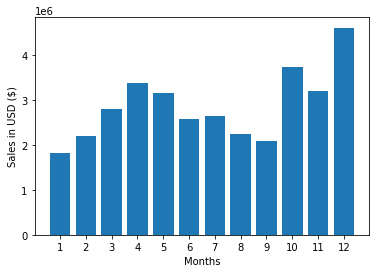

In [18]:
# Visualizing Sales over the year

months = range(1,13)
results = all_data.groupby('Month')['Sales'].sum()
plt.bar(months, results)
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sales in USD ($)')
plt.show()

Why certain months performed better that other? Maybe due to some Campaigns, NLs, etc
Or maybe we spend more money on advertising? or changed the Ad strategy
In december, maybe due to Christmas & Halloween & new year, people are buying gifts

### Sales by City & state

In [36]:
all_data.groupby('City')['Sales'].sum().sort_values()

City
Austin           1819581.75
Portland         2320490.61
Seattle          2747755.48
Dallas           2767975.40
Atlanta          2795498.58
Boston           3661642.01
New York City    4664317.43
Los Angeles      5452570.80
San Francisco    8262203.91
Name: Sales, dtype: float64

It seems **San Francisco** had highest no of sales while **Austin** performed worst out of all.

In [45]:
cols=['Quantity Ordered','Sales']
all_data.groupby(['State','City'])[cols].sum().sort_values(by='Sales')

,,Quantity Ordered,Sales
State,City,,
ME,Portland,2750,449758.27
TX,Austin,11153,1819581.75
OR,Portland,11303,1870732.34
WA,Seattle,16553,2747755.48
TX,Dallas,16730,2767975.40
GA,Atlanta,16602,2795498.58
MA,Boston,22528,3661642.01
NY,New York City,27932,4664317.43
CA,Los Angeles,33289,5452570.80


*  As we can see, that Portland which was ranking the second worst performer earlier has changed in ranking now. **Portland, ME(Maine)** seems to have the worst sales out of all. We should investigate further as to why *Maine* performed so poorly.

*  Austin was ranked with 2nd worst sales while Dallas had fairly good sales. Need to check why one city performed better than the other in same state

*  Also, 2 of our *top performing cities* belong to the same state i.e **CA(California).**

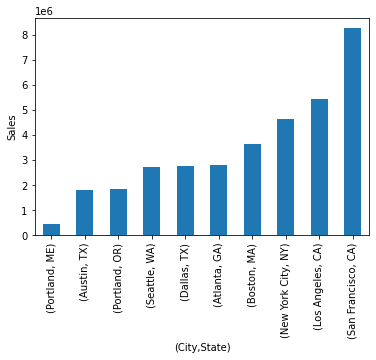

In [6]:
# Visualizing Sales by City & state

all_data.groupby(['City', 'State'])['Sales'].sum().sort_values().plot.bar(xlabel='(City,State)', ylabel='Sales')
plt.show()

### Best time to display advertisements to maximize likelihood of customer's buying product

#### For all cities

In [10]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX,8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA,22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA,14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,9,27


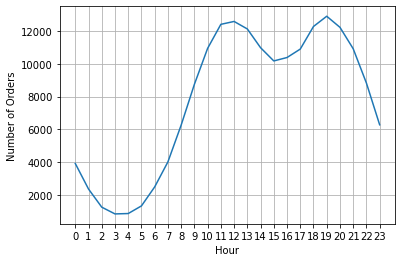

In [27]:
# Plotting No of Sales by Hour

hours = [hour for hour, df in all_data.groupby(['Hour'])]   #doing this ensures x & y will have same order(order of groupby result) and inconsistencies wont be there

all_data.groupby('Hour')['Sales'].count().plot.line()
plt.xticks(hours)
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

* We should show ads slightly *before 11am(11) or 7PM(19)*, afterwhich we can see a rise in the no of orders at our store

#### Specific cities

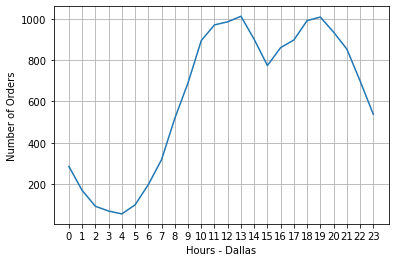

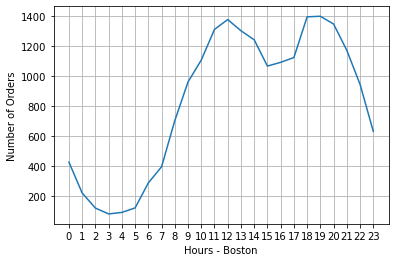

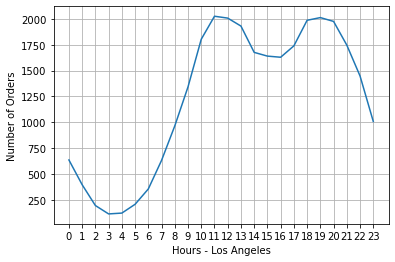

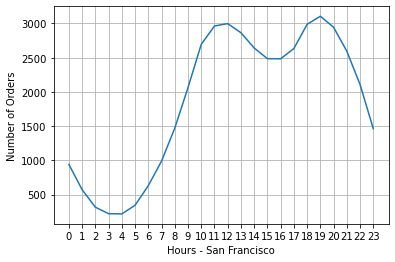

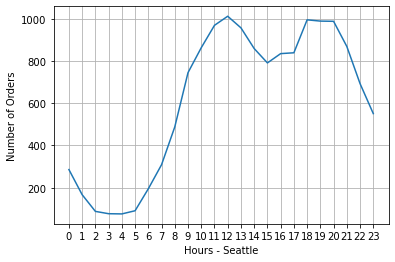

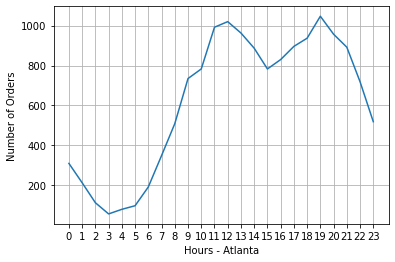

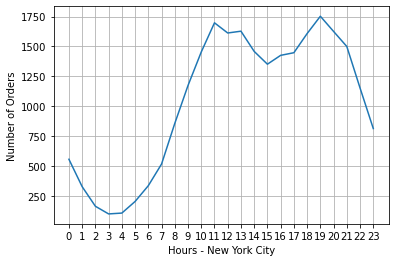

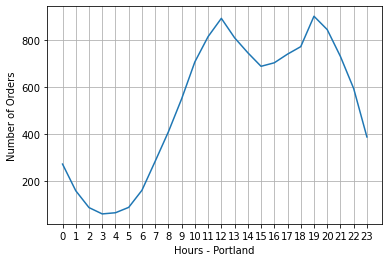

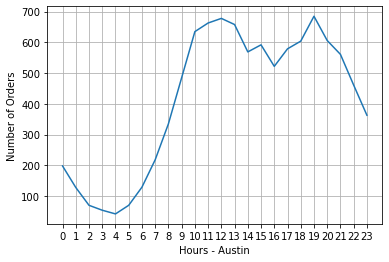

In [33]:
cities= all_data['City'].unique()

for city in cities:
    hours = [hour for hour, df in all_data.groupby(['Hour'])]   #doing this ensures x & y will have same order(order of groupby result) and inconsistencies wont be there
    res = all_data.loc[(all_data['City']==city)]
    res.groupby('Hour')['Sales'].count().plot.line()
    plt.xticks(hours)
    plt.ylabel('Number of Orders')
    plt.xlabel('Hours - '+city)
    plt.grid()
    plt.show()




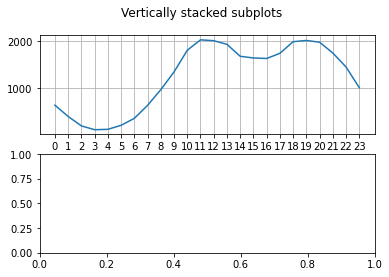

In [35]:
hours = [hour for hour, df in all_data.groupby(['Hour'])]
res = all_data.loc[(all_data['City']=='Los Angeles')]
fig, axs = plt.subplots(2)
fig.suptitle('Vertically stacked subplots')
axs[0].plot(hours,res.groupby('Hour')['Sales'].count())
axs[0].set_xticks(hours) 
axs[0].grid()
plt.show()
#axs[1].plot(x, -y)


#### Products that are most often sold together

In [24]:
df = all_data.loc[all_data['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))
df = df[['Order ID','Grouped']].drop_duplicates()
df.head()

C:\Users\user\AppData\Local\Temp/ipykernel_7896/341281931.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))


,Order ID,Grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [28]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count1 = Counter()
count2  = Counter()

for row in df['Grouped']:
    row_list= row.split(',')
    count1.update(Counter(combinations(row_list,2)))  #to check pairs of 2 products only
    count2.update(Counter(combinations(row_list,3)))
    
print('Combination of 2 products in single transaction\n')
for key,value in count1.most_common(10):
    print(key, value)
    
print('\nCombination of 3 products in single transaction\n')
for key,value in count2.most_common(10):
    print(key, value)

Combination of 2 products in single transaction

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92

Combination of 3 products in single transaction

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 87
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wi

In [90]:
#df['Grouped'].value_counts() incorrect count

iPhone,Lightning Charging Cable                                            882
Google Phone,USB-C Charging Cable                                          856
iPhone,Wired Headphones                                                    361
Vareebadd Phone,USB-C Charging Cable                                       312
Google Phone,Wired Headphones                                              303
                                                                          ... 
Google Phone,USB-C Charging Cable,Wired Headphones,USB-C Charging Cable      1
34in Ultrawide Monitor,LG Washing Machine                                    1
20in Monitor,iPhone                                                          1
Google Phone,USB-C Charging Cable,Wired Headphones,27in FHD Monitor          1
LG Washing Machine,AA Batteries (4-pack)                                     1
Name: Grouped, Length: 366, dtype: int64

#### What product sold the most? Why do you think it sold the most?

In [12]:
res = all_data.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)
res

Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
34in Ultrawide Monitor         6199
Google Phone                   5532
Flatscreen TV                  4819
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
20in Monitor                   4129
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int64

Text(0, 0.5, 'Quantity ordered')

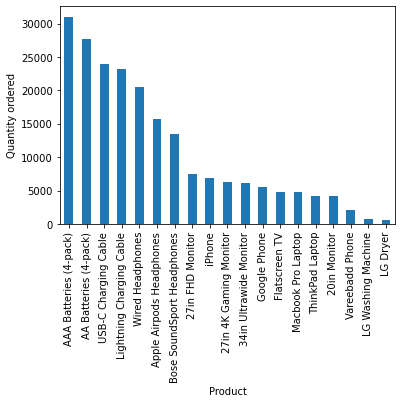

In [13]:
res.plot.bar()
plt.xlabel('Product')
plt.ylabel('Quantity ordered')

Batteries are cheap compared to Washing machine etc, that is why maybe they are ordered the most

##### Overlaying a secondary axis(y-axis) on existing chart

C:\Users\user\AppData\Local\Temp/ipykernel_7896/3858365163.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=8)


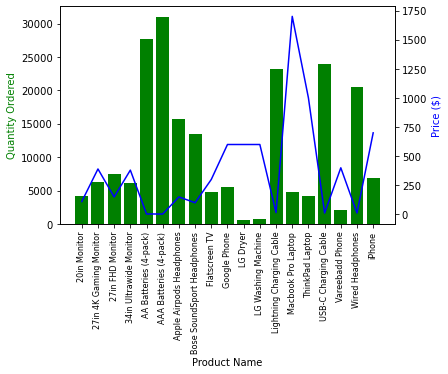

In [20]:
## ##### Prices and quantity ordered relation

prices = all_data.groupby('Product').mean()['Price Each']

product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

plt.show()

 Macbook Pro laptop & thinkpad laptop - eventhoug prices are much higher than LG dryer,they are still having good sale. Check where & when is the sale most for these products and if we had age column, we could find which age group we should target to improve these products' sales.

In [21]:
keys

['20in Monitor',
 '27in 4K Gaming Monitor',
 '27in FHD Monitor',
 '34in Ultrawide Monitor',
 'AA Batteries (4-pack)',
 'AAA Batteries (4-pack)',
 'Apple Airpods Headphones',
 'Bose SoundSport Headphones',
 'Flatscreen TV',
 'Google Phone',
 'LG Dryer',
 'LG Washing Machine',
 'Lightning Charging Cable',
 'Macbook Pro Laptop',
 'ThinkPad Laptop',
 'USB-C Charging Cable',
 'Vareebadd Phone',
 'Wired Headphones',
 'iPhone']

#### What is the total transaction “penetration” for each product?